# **PowerPoint**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
import requests

In [4]:
from datetime import datetime, timedelta
import winsound

In [5]:
import json

In [6]:
from pptx import Presentation
from pptx.util import Inches

## **Variables Generales**

In [7]:
datetime_now = datetime.now()
dia = int(str(datetime.now()).replace('-', '')[:8])

## **1. Llamada de los datos**

In [8]:
%%time
try:
    df = pd.read_csv('./Datos/currencies.csv')
except:
    full_list_url = 'https://finance.yahoo.com/currencies'
    full_list_page = requests.get(full_list_url)

    df = pd.read_html(full_list_page.text)[0].drop_duplicates()
    
    df.to_csv('./Datos/currencies.csv', index=False)

Wall time: 40.5 ms


In [9]:
df.sample()

,Symbol,Name,Last Price,Change,% Change,52 Week Range,Day Chart
11,EURHUF=X,EUR/HUF,380.45,0.81,+0.21%,NaN,NaN


## **2. Limpieza y exploración**

In [10]:
df['pct_change'] = df['% Change'].str.slice(stop=-1).astype('float')

In [11]:
df.sample()

,Symbol,Name,Last Price,Change,% Change,52 Week Range,Day Chart,pct_change
17,PHP=X,USD/PHP,54.53,0.264,+0.49%,NaN,NaN,0.49


**Identificamos los mayores y menores cambios porcentuales**

In [12]:
sort_df = df.sort_values('pct_change', ascending=False)
sort_df = sort_df[['Name', 'Last Price', 'Change', 'pct_change']]

In [13]:
top_df = sort_df.head(5).reset_index(drop=True)
top_name = top_df['Name'][0].replace('/', '')
top_df

,Name,Last Price,Change,pct_change
0,USD/THB,34.4200,0.2700,0.79
1,USD/PHP,54.5300,0.2640,0.49
2,USD/ZAR,17.8541,0.0789,0.44
3,USD/JPY,133.3390,0.5420,0.41
4,USD/CNY,6.8918,0.0247,0.36


In [14]:
bottom_df = sort_df.tail(5).sort_values('pct_change').reset_index(drop=True)
bottom_name = bottom_df['Name'][0].replace('/', '')
bottom_df

,Name,Last Price,Change,pct_change
0,USD/NZD,0.6224,-0.0037,-0.59
1,EUR/USD,1.0797,-0.0050,-0.46
2,EUR/CAD,1.4589,-0.0056,-0.39
3,USD/GBP,1.2284,-0.0048,-0.39
4,USD/RUB,77.6800,-0.2960,-0.38


## **3. Llamada de más datos**

In [15]:
def llamada_precios(indicador):
    url = f'https://query1.finance.yahoo.com/v8/finance/chart/{indicador}=X?region=US&lang=en-US&includePrePost=false&interval=30m&useYfid=true&range=1mo&corsDomain=finance.yahoo.com&.tsrc=finance'
 
    header = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
    }

    page = requests.get(url, headers=header)
    
    return page

In [16]:
USDTHB = llamada_precios('USDTHB')
USDNZD = llamada_precios('USDNZD')

In [17]:
def grafico_precios(precios, nombre):
    data_json = json.loads(precios.text)
    list_price = data_json['chart']['result'][0]['indicators']['quote'][0]['close']
    list_price = [i for i in list_price if i != None]    
    
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.plot(list_price, color='#43B7A4')
    ax.set_xticks([])
    ax.tick_params(
        axis='y',
        colors='#43B7A4',
        labelsize=12
    )

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_color('#43B7A4')
        ax.spines[axis].set_linewidth(2)

    plt.savefig(f'./Graficos/{nombre}.png', transparent=True)

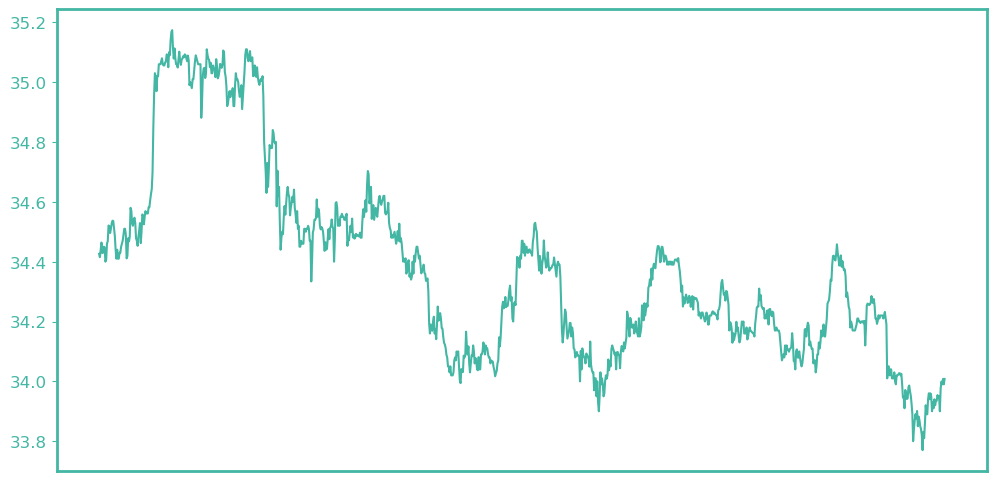

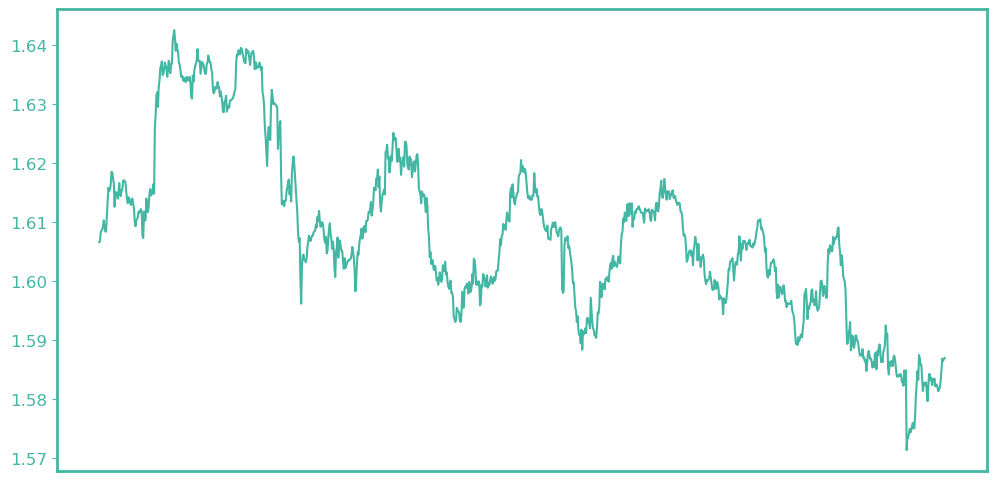

In [18]:
grafico_precios(USDTHB, 'Grafico_USDTHB')
grafico_precios(USDNZD, 'Grafico_USDNZD')

## **4. Trabajando con PowerPoint**

### **Slide básico**

In [19]:
prs = Presentation()

title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout) 

title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = 'Hello, World!'
subtitle.text = 'Python PPTX was here'

prs.save('test.pptx')

### **Slide con viñetas**

In [20]:
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor
from pptx.util import Inches, Pt
from pptx.enum.dml import MSO_THEME_COLOR

**Inicializamos la presentación**

In [21]:
prs = Presentation()

**Agregamos Slides**

In [22]:
# Creamos el slide
slide = prs.slides.add_slide(prs.slide_layouts[6])

# Especificamos el tamaño del slide
prs.slide_width = Inches(13.33)
prs.slide_heigth = Inches(7.5)

**Encabezado**

In [23]:
shape = slide.shapes.add_shape(
    MSO_SHAPE.RECTANGLE, 
    0, 0, Inches(13.33), Inches(0.8)
)

shape.shadow.inherit = False

fill=shape.fill
fill.solid()
fill.fore_color.rgb=RGBColor(11, 36, 71)

line=shape.line
line.color.rgb=RGBColor(11, 36, 71)

logo = slide.shapes.add_picture(
    './Graficos/logo.png',
    Inches(0.2), Inches(0.15), Inches(0.5), Inches(0.5)
)

In [24]:
prs.save('test.pptx')